# <a href="https://girafe.ai/" target="_blank" rel="noopener noreferrer"><img src="https://raw.githubusercontent.com/girafe-ai/ml-course/7096a5df4cada5ee651be1e3215c2f7fb8a7e0bf/logo_margin.svg" alt="girafe-ai logo" width="150px" align="left"></a> [ml-basic course](https://github.com/girafe-ai/ml-course) <a class="tocSkip">

# Lab assignment №1, part 2

This lab assignment consists of several parts.

In this part you will work with SVM algorithm and it's kernels.

Several comments:
* Don't hesitate to ask questions in a chat, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons

Let's generate our dataset and take a look on it.

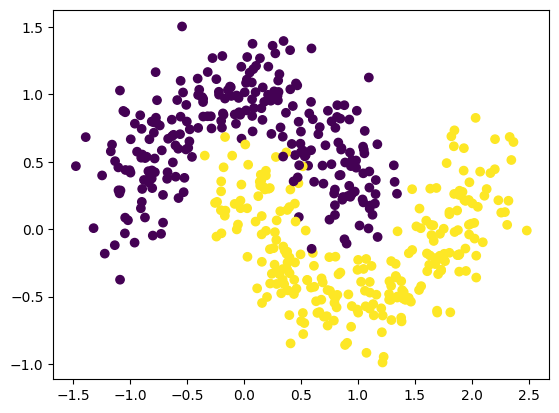

In [ ]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models

First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

* train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded)
* plot their decision regions
* calculate preffered classification metrics.
* describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and plot with matplotlib yourself or use [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

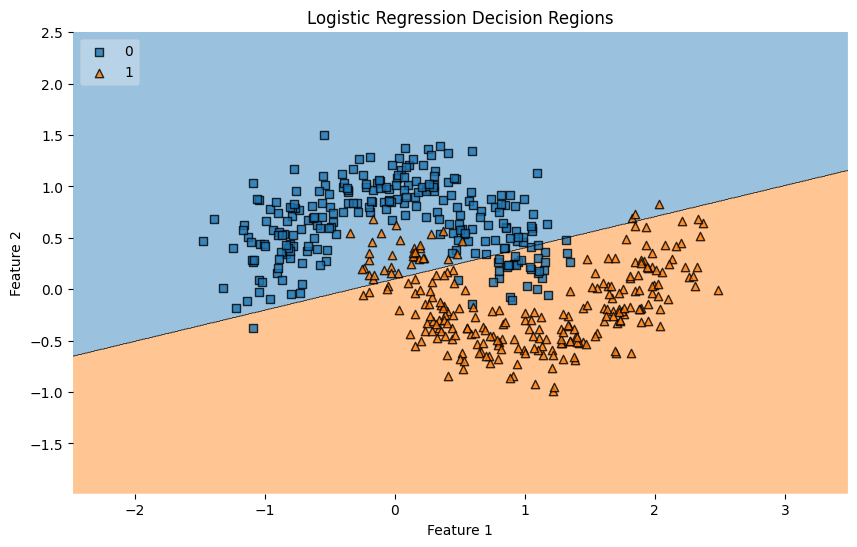

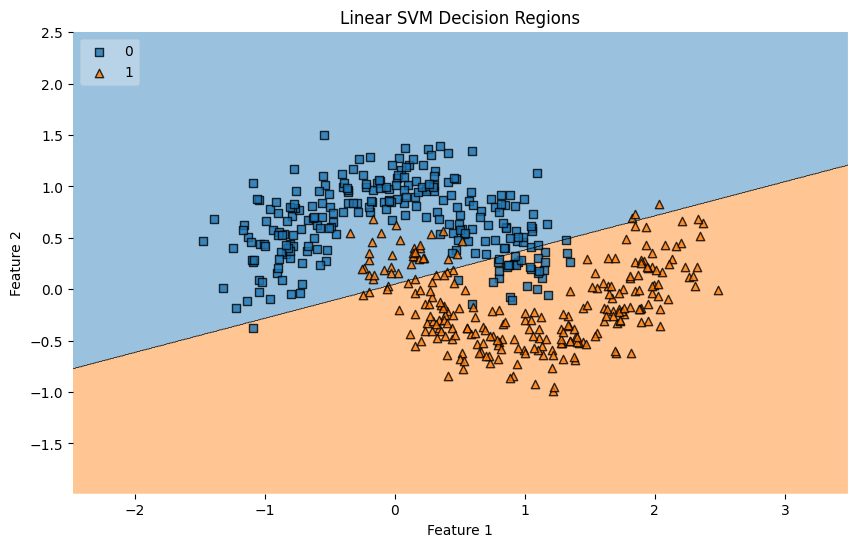

Logistic Regression Accuracy: 0.8560, F1 Score: 0.8560
Linear SVM Accuracy: 0.8580, F1 Score: 0.8580


In [ ]:
from mlxtend.plotting import plot_decision_regions
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, roc_curve, auc


lr = LogisticRegression(C=1.0, solver='lbfgs', max_iter=1000)
svm = SVC(kernel="linear", C=1.0)

def plot_decisions(X, y, estimator, title):
    plt.figure(figsize=(10, 6))
    plot_decision_regions(X, y, clf=estimator, legend=2)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

lr.fit(moons_points, moons_labels)
svm.fit(moons_points, moons_labels)

plot_decisions(moons_points, moons_labels, lr, "Logistic Regression Decision Regions")
plot_decisions(moons_points, moons_labels, svm, "Linear SVM Decision Regions")

def calculate_metrics(estimator, X, y):
    y_pred = estimator.predict(X)
    accuracy = accuracy_score(y, y_pred)
    f1 = f1_score(y, y_pred, average='macro')
    return accuracy, f1

lr_accuracy, lr_f1 = calculate_metrics(lr, moons_points, moons_labels)
svm_accuracy, svm_f1 = calculate_metrics(svm, moons_points, moons_labels)

print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}, F1 Score: {lr_f1:.4f}")
print(f"Linear SVM Accuracy: {svm_accuracy:.4f}, F1 Score: {svm_f1:.4f}")

Что логистическая регрессия, что линейный SVM плохо справляются с разделением линейно неразделимых данных obvious :|

## 1.2 Kernel tirck

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel
* estimate optimal params (with a few manual trials)
* plot decision regions
* calculate metrics you've chosen eariler

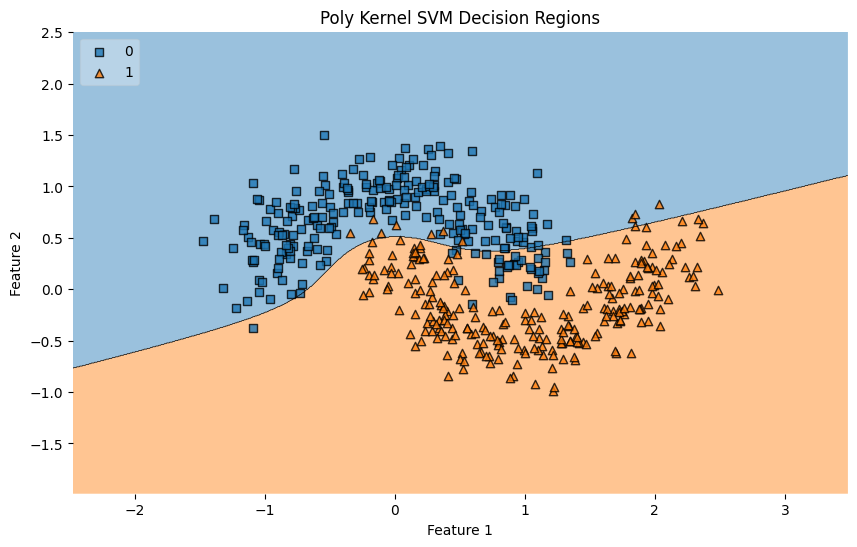

Poly Kernel SVM Accuracy: 0.9060, F1 Score: 0.9058


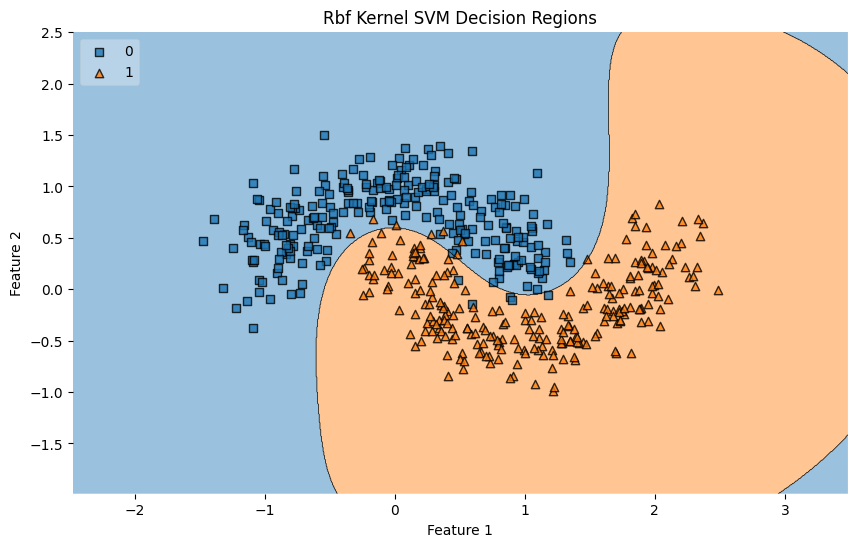

Rbf Kernel SVM Accuracy: 0.9740, F1 Score: 0.9740


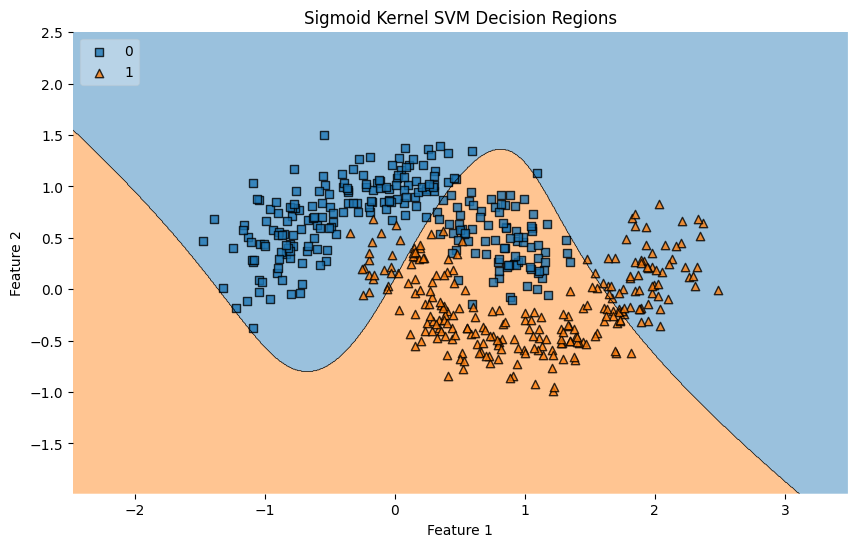

Sigmoid Kernel SVM Accuracy: 0.6480, F1 Score: 0.6480


In [ ]:
def plot_decisions(X, y, estimator, title):
    plt.figure(figsize=(10, 6))
    plot_decision_regions(X, y, clf=estimator, legend=2)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

def calculate_metrics(estimator, X, y):
    y_pred = estimator.predict(X)
    accuracy = accuracy_score(y, y_pred)
    f1 = f1_score(y, y_pred, average='macro')
    return accuracy, f1

kernels = {
    'poly': {'kernel': 'poly', 'degree': 3, 'C': 1.0},
    'rbf': {'kernel': 'rbf', 'gamma': 'scale', 'C': 1.0},
    'sigmoid': {'kernel': 'sigmoid', 'gamma': 'scale', 'C': 1.0}
}

for kernel_name, params in kernels.items():
    svm = SVC(**params)
    svm.fit(moons_points, moons_labels)

    plot_decisions(moons_points, moons_labels, svm, f"{kernel_name.capitalize()} Kernel SVM Decision Regions")

    accuracy, f1 = calculate_metrics(svm, moons_points, moons_labels)
    print(f"{kernel_name.capitalize()} Kernel SVM Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}")


Лучше всего справился RBF Kernel

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

*   Качество классификации возросло
*   Poly Kernel - границы полиномиальные; RBF Kernel - гладкие и нелинейные границы; Sigmoid Kernel - границы гладкие, но не такие гибкие, как другие kernel
*   Полином третьей степени достаточно гибок, чтобы аппроксимировать нелинейную границу между классами



## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

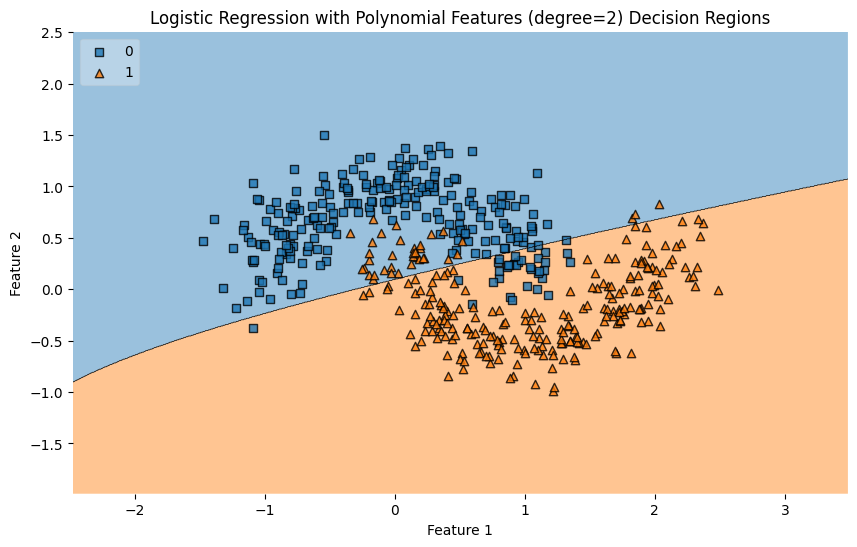

Logistic Regression with Polynomial Features (degree=2) Accuracy: 0.8600, F1 Score: 0.8600


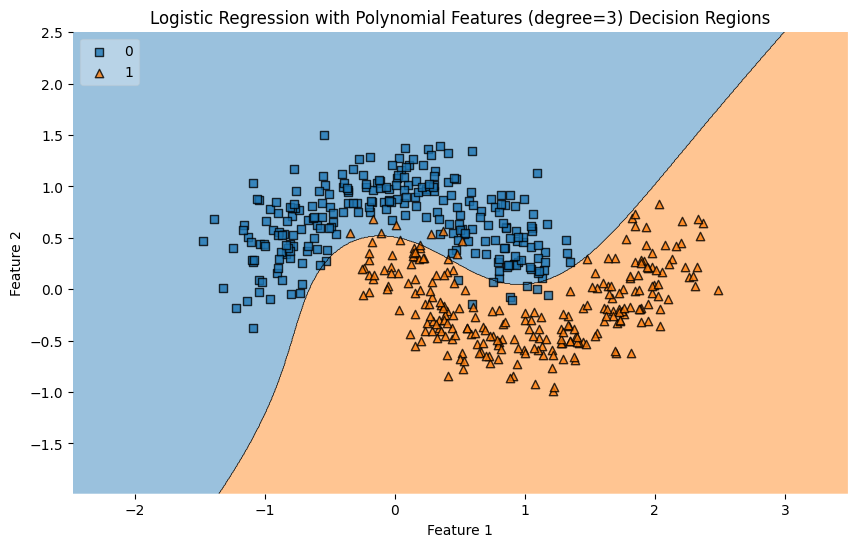

Logistic Regression with Polynomial Features (degree=3) Accuracy: 0.9680, F1 Score: 0.9680


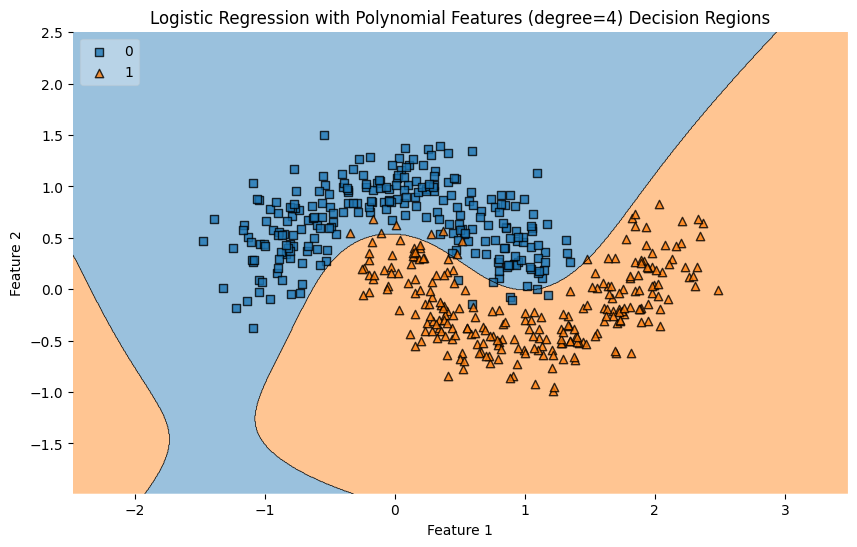

Logistic Regression with Polynomial Features (degree=4) Accuracy: 0.9700, F1 Score: 0.9700


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


def plot_decisions(X, y, estimator, title):
    plt.figure(figsize=(10, 6))
    plot_decision_regions(X, y, clf=estimator, legend=2)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

def calculate_metrics(estimator, X, y):
    y_pred = estimator.predict(X)
    accuracy = accuracy_score(y, y_pred)
    f1 = f1_score(y, y_pred, average='macro')
    return accuracy, f1

degrees = [2, 3, 4]

for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree), LogisticRegression(max_iter=1000))
    model.fit(moons_points, moons_labels)

    plot_decisions(moons_points, moons_labels, model, f"Logistic Regression with Polynomial Features (degree={degree}) Decision Regions")

    accuracy, f1 = calculate_metrics(model, moons_points, moons_labels)
    print(f"Logistic Regression with Polynomial Features (degree={degree}) Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}")




Как видим, логистическая регрессия с полиномиальными признаками может успешно решать задачу классификации на линейно неразделимых данных.

Тип границ принятия решений у логистической регрессии с полиномиальными признаками может быть более сложным, чем у линейного SVM, но менее гибким, чем у SVM с ядром RBF


## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

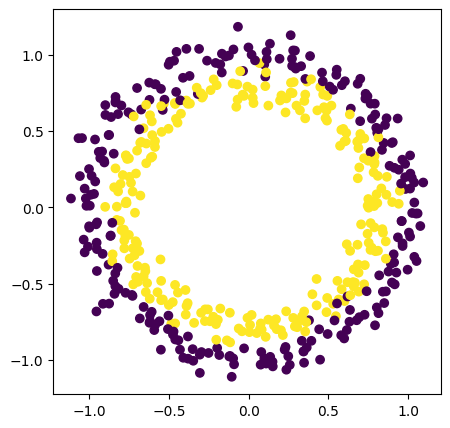

In [ ]:
from sklearn.datasets import make_circles


circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

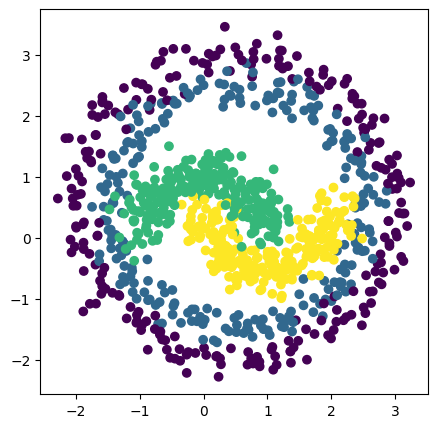

In [ ]:
points = np.vstack((circles_points * 2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2))

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

On that harder problem compare SVM and Gradient boosting.

Tune GB (manually ok), then SVM with appropriate kernel of your choice.

Again plot decision regions, calculate metrics.

Justify the results in a few phrases.

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


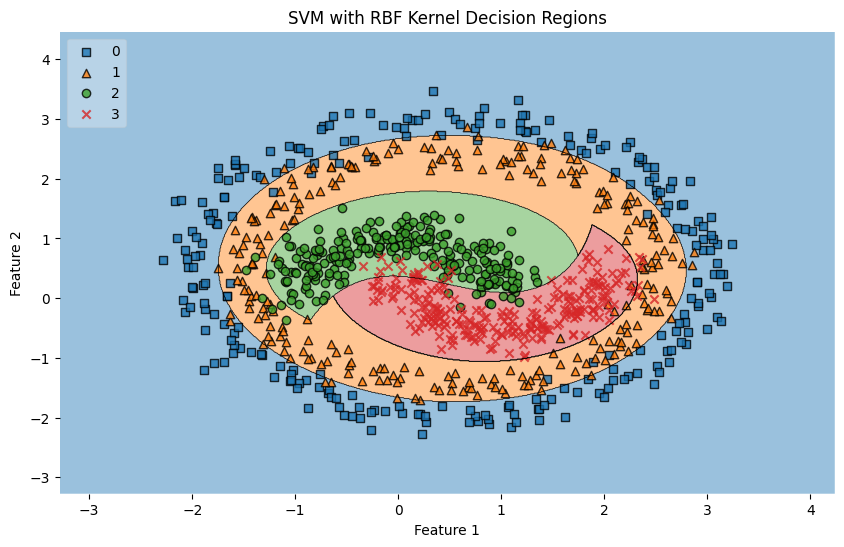

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


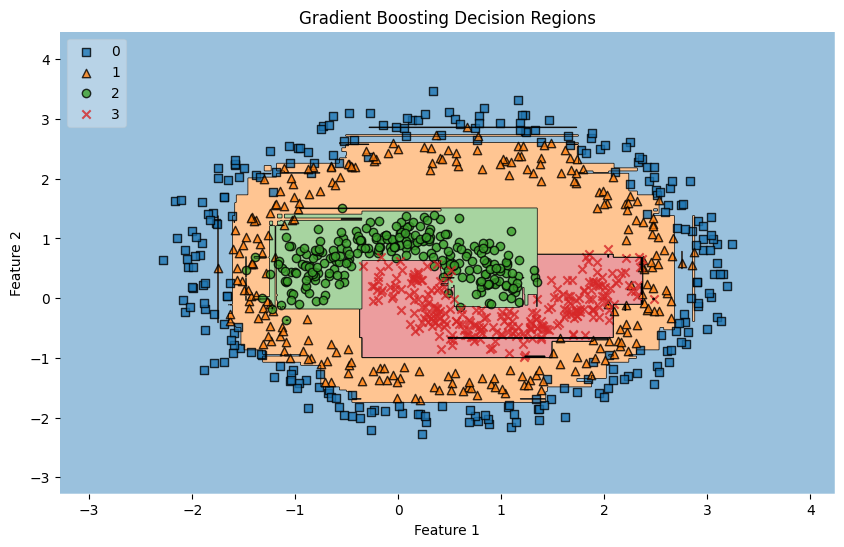

SVM with RBF Kernel Accuracy: 0.9210, F1 Score: 0.9210
Gradient Boosting Accuracy: 0.9920, F1 Score: 0.9920


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

def plot_decisions(X, y, estimator, title):
    plt.figure(figsize=(10, 6))
    plot_decision_regions(X, y, clf=estimator, legend=2)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

def calculate_metrics(estimator, X, y):
    y_pred = estimator.predict(X)
    accuracy = accuracy_score(y, y_pred)
    f1 = f1_score(y, y_pred, average='macro')
    return accuracy, f1

svm = SVC(kernel='rbf', C=1.0, gamma='scale')
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

svm.fit(points, labels)
gb.fit(points, labels)

plot_decisions(points, labels, svm, "SVM with RBF Kernel Decision Regions")
plot_decisions(points, labels, gb, "Gradient Boosting Decision Regions")

svm_accuracy, svm_f1 = calculate_metrics(svm, points, labels)
gb_accuracy, gb_f1 = calculate_metrics(gb, points, labels)

print(f"SVM RBF Kernel Accuracy: {svm_accuracy:.4f}, F1 Score: {svm_f1:.4f}")
print(f"GB Accuracy: {gb_accuracy:.4f}, F1 Score: {gb_f1:.4f}")


Градиентный бустинг справился с задачей лучше, но есть намеки на переобучение